<a href="https://colab.research.google.com/github/IsaqueFabro/Desafios-DNC/blob/main/Desafio%207%20Isaque%20Fabro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crie um modelo de análise das métricas RFV**
## Contexto

Você foi contratado por uma empresa de e-commerce que está buscando entender
melhor o comportamento de seus clientes para personalizar as suas campanhas de
marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo
dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011.

Com base nesses dados, você precisa agrupar os clientes em clusters com base em
seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:

*   Clientes que compram os mesmos produtos;
*   Clientes que possuem a mesma frequência de compras;
*   Clientes que gastam mais dinheiro em suas compras.


A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.

### **Sobre os dados**

Os dados fornecidos possuem informações de transações de compras de uma loja de
e-commerce em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# Carregar os dados
data = pd.read_csv("/content/data.csv", encoding='ISO-8859-1')
data.head(5+1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Informações gerais sobre o dataset
data.info()

# Estatísticas descritivas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Remover dados ausentes e duplicados
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Convertendo a coluna de data para datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Adicionando uma coluna de valor total (Quantidade * Preço Unitário)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [ ]:
import datetime as dt

# Definindo a data de referência para calcular a recência
reference_date = dt.datetime(2011, 12, 10)

# Cálculo das métricas RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()

# Renomeando as colunas RFM
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Filtrando clientes com valores monetários positivos
rfm = rfm[rfm['Monetary'] > 0]

print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40
5     12352.0       36         95   1545.41


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

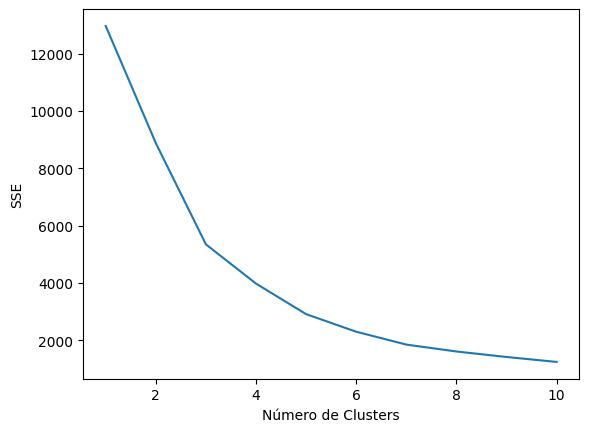

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Padronizando as métricas RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Encontrando o número ideal de clusters usando o método Elbow
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

# Plotando o gráfico do método Elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Treinando o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=4, random_state=1)  # Supondo que 4 é o número ideal de clusters
kmeans.fit(rfm_scaled)

# Adicionando os rótulos dos clusters ao dataframe RFM
rfm['Cluster'] = kmeans.labels_

# Calculando as médias das métricas RFM para cada cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).reset_index()

print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster     Recency    Frequency       Monetary  NumCustomers
0        0   39.240741   105.745370    2020.337195          3240
1        1  243.482759    28.264678     491.903151          1073
2        2    8.400000  1012.200000  192037.944000             5
3        3    1.500000  5824.250000   64463.562500             4


In [ ]:
# Gerando insights a partir dos clusters
for cluster in cluster_summary['Cluster']:
    print(f"\nCluster {cluster}:")
    print(f"Número de Clientes: {cluster_summary.loc[cluster, 'NumCustomers']}")
    print(f"Recência Média: {cluster_summary.loc[cluster, 'Recency']}")
    print(f"Frequência Média: {cluster_summary.loc[cluster, 'Frequency']}")
    print(f"Valor Monetário Médio: {cluster_summary.loc[cluster, 'Monetary']}")


Cluster 0:
Número de Clientes: 3240
Recência Média: 39.24074074074074
Frequência Média: 105.74537037037037
Valor Monetário Médio: 2020.3371953703704

Cluster 1:
Número de Clientes: 1073
Recência Média: 243.48275862068965
Frequência Média: 28.264678471575024
Valor Monetário Médio: 491.9031509785648

Cluster 2:
Número de Clientes: 5
Recência Média: 8.4
Frequência Média: 1012.2
Valor Monetário Médio: 192037.944

Cluster 3:
Número de Clientes: 4
Recência Média: 1.5
Frequência Média: 5824.25
Valor Monetário Médio: 64463.5625


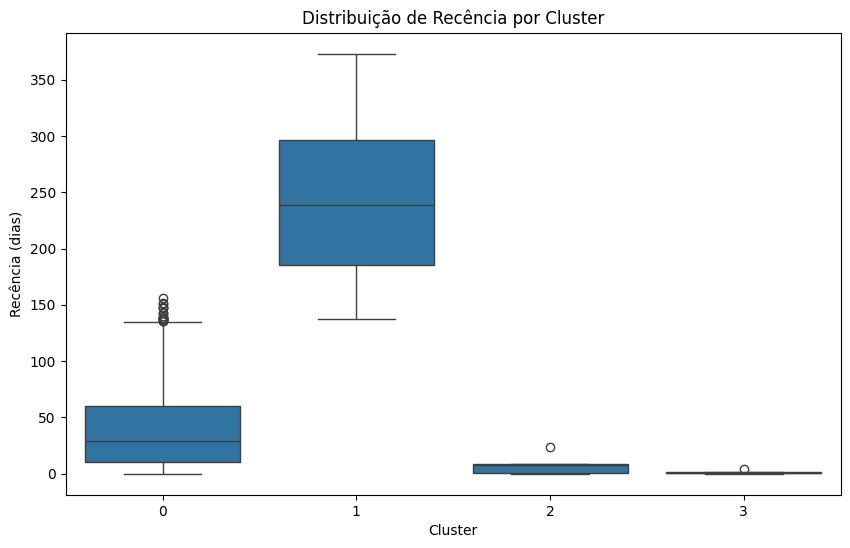

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribuição de Recência por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Distribuição de Recência por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recência (dias)')
plt.show()

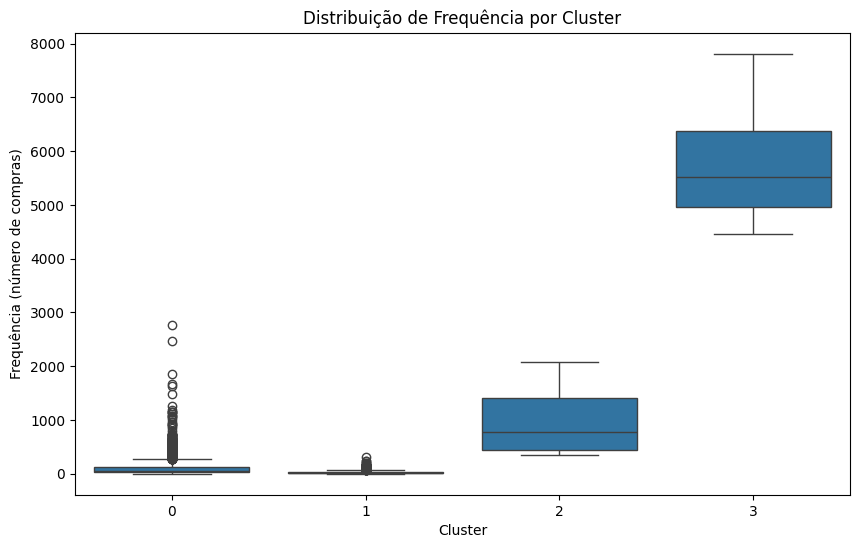

In [ ]:
# Gráfico de distribuição de Frequência por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Distribuição de Frequência por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequência (número de compras)')
plt.show()

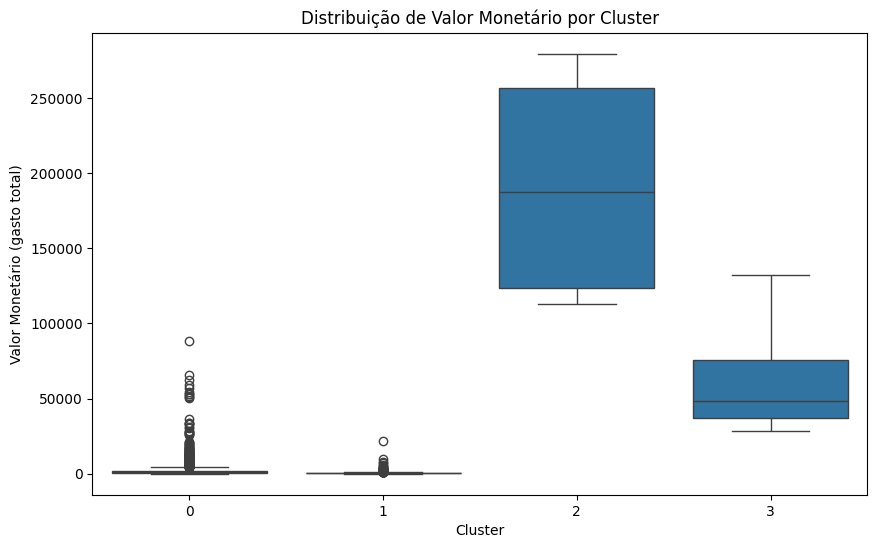

In [ ]:
# Gráfico de distribuição de Valor Monetário por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Distribuição de Valor Monetário por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Monetário (gasto total)')
plt.show()


Cluster 0:
Número de Clientes: 3240
Recência Média: 39.24074074074074
Frequência Média: 105.74537037037037
Valor Monetário Médio: 2020.3371953703704
Estratégia de Marketing para Cluster 0:
 - Fidelização: Oferecer programas de fidelidade e descontos exclusivos.
 - Cross-sell/Up-sell: Sugerir produtos complementares e de maior valor.
 - Feedback: Pedir feedback sobre novos produtos e serviços.

Cluster 1:
Número de Clientes: 1073
Recência Média: 243.48275862068965
Frequência Média: 28.264678471575024
Valor Monetário Médio: 491.9031509785648
Estratégia de Marketing para Cluster 1:
 - Reativação: Enviar e-mails de reengajamento com ofertas especiais.
 - Promoções: Oferecer descontos ou promoções para incentivar novas compras.
 - Pesquisa: Entender os motivos da baixa frequência de compra.

Cluster 2:
Número de Clientes: 5
Recência Média: 8.4
Frequência Média: 1012.2
Valor Monetário Médio: 192037.944
Estratégia de Marketing para Cluster 2:
 - Manutenção: Manter o engajamento com campanhas

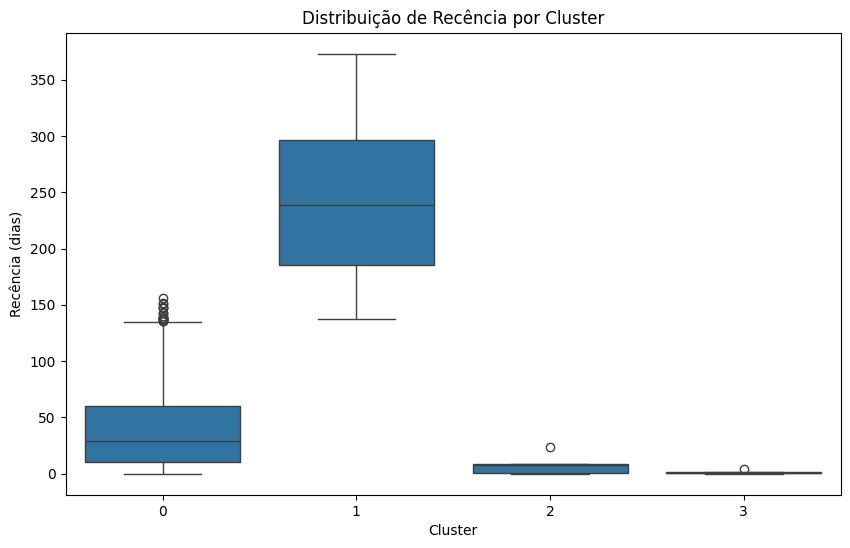

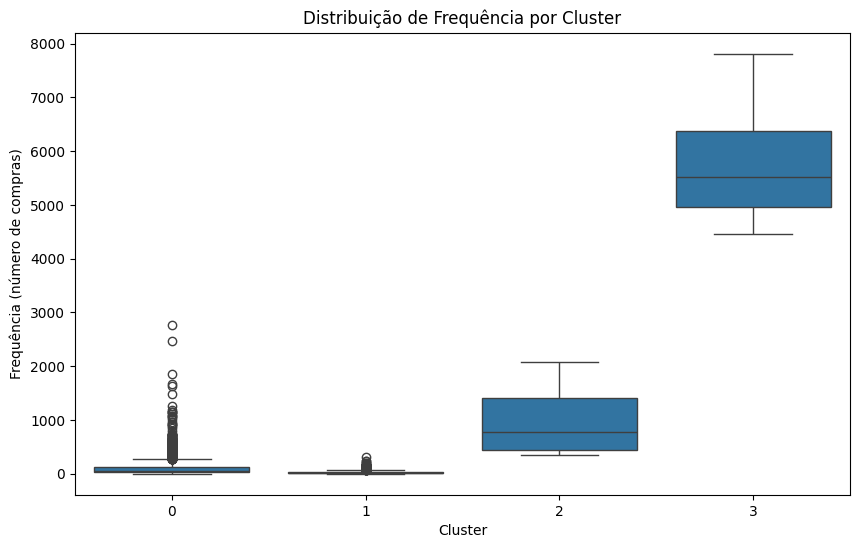

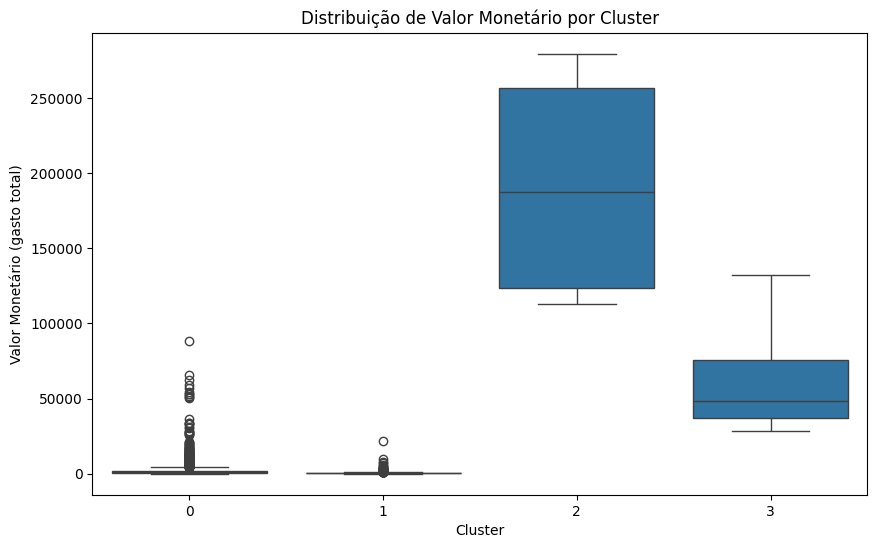

In [ ]:
# Geração de insights e estratégias de marketing
for cluster in cluster_summary['Cluster']:
    print(f"\nCluster {cluster}:")
    print(f"Número de Clientes: {cluster_summary.loc[cluster, 'NumCustomers']}")
    print(f"Recência Média: {cluster_summary.loc[cluster, 'Recency']}")
    print(f"Frequência Média: {cluster_summary.loc[cluster, 'Frequency']}")
    print(f"Valor Monetário Médio: {cluster_summary.loc[cluster, 'Monetary']}")

    if cluster == 0:
        print("Estratégia de Marketing para Cluster 0:")
        print(" - Fidelização: Oferecer programas de fidelidade e descontos exclusivos.")
        print(" - Cross-sell/Up-sell: Sugerir produtos complementares e de maior valor.")
        print(" - Feedback: Pedir feedback sobre novos produtos e serviços.")
    elif cluster == 1:
        print("Estratégia de Marketing para Cluster 1:")
        print(" - Reativação: Enviar e-mails de reengajamento com ofertas especiais.")
        print(" - Promoções: Oferecer descontos ou promoções para incentivar novas compras.")
        print(" - Pesquisa: Entender os motivos da baixa frequência de compra.")
    elif cluster == 2:
        print("Estratégia de Marketing para Cluster 2:")
        print(" - Manutenção: Manter o engajamento com campanhas regulares.")
        print(" - Personalização: Oferecer recomendações de produtos com base no histórico de compras.")
        print(" - Incentivos: Oferecer descontos para compras futuras.")
    elif cluster == 3:
        print("Estratégia de Marketing para Cluster 3:")
        print(" - Fidelização de Alto Valor: Criar ofertas VIP e serviços personalizados.")
        print(" - Up-sell: Sugerir produtos premium ou de alta margem.")
        print(" - Experiência: Oferecer experiências exclusivas, como eventos ou lançamentos de produtos.")

# Gráficos de distribuição por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Distribuição de Recência por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recência (dias)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Distribuição de Frequência por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequência (número de compras)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Distribuição de Valor Monetário por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Monetário (gasto total)')
plt.show()